# Distributions

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import datetime

# Bernouli Distribution

In [2]:
from scipy.stats import bernoulli

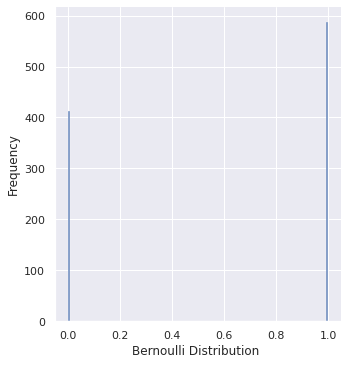

In [19]:
data_bern = bernoulli.rvs(size = 1000, p = 0.6)

ax = sns.displot(data_bern,
                 bins=100,
                 kde=False,
                 )
ax.set(xlabel="Bernoulli Distribution ", ylabel="Frequency")

# Binomial Distribution

In [4]:
from scipy.stats import binom

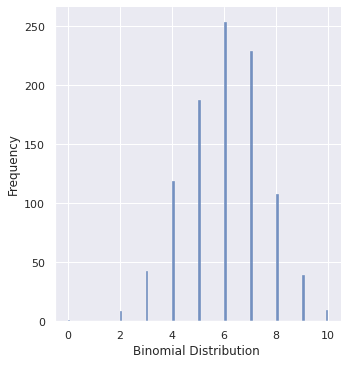

In [20]:
data_binom = binom.rvs(n=10, p=0.6, size=1000)
ax = sns.displot(data_binom,
                 bins=100,
                 kde=False
                 )
label = ax.set(xlabel="Binomial Distribution ", ylabel='Frequency')

# Poisson Distribution

In [6]:
from scipy.stats import poisson

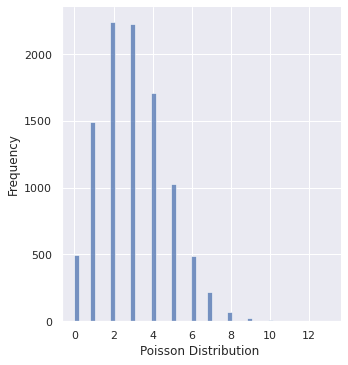

In [21]:
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.displot(data_poisson,
                 bins=50,
                 kde=False)
label = ax.set(xlabel="Poisson Distribution ", ylabel="Frequency")

# Continous Distribution

## Uniform Distribution

In [8]:
from scipy.stats import uniform

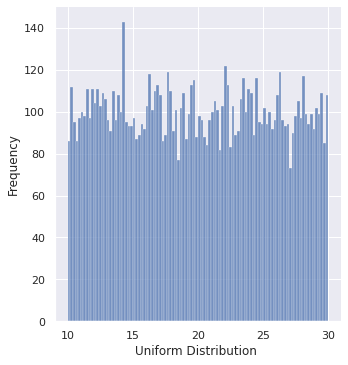

In [22]:
n = 10000

start = 10
width = 20

data_uniform = uniform.rvs(size=n, loc = start, scale=width)
ax = sns.displot(data_uniform,
                 bins=100,
                 kde=False,
                 )
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

# Normal Distribution / Gaussian Distribution

In [10]:
from scipy.stats import norm

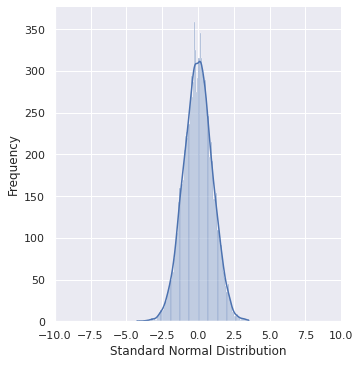

In [23]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)

ax = sns.displot(data_normal,
                 bins=100,
                 kde=True,
                 )
plt.xlim(-10, 10)
label = ax.set(xlabel='Standard Normal Distribution', ylabel = 'Frequency')

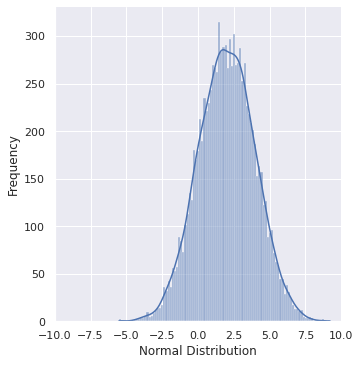

In [24]:
data_normal = norm.rvs(size=10000, loc=2, scale=2)

ax = sns.displot(data_normal,
                 bins=100,
                 kde=True,
                 )
plt.xlim(-10, 10)
label = ax.set(xlabel='Normal Distribution', ylabel = 'Frequency')

# Exponential Distribution

In [13]:
from scipy.stats import expon

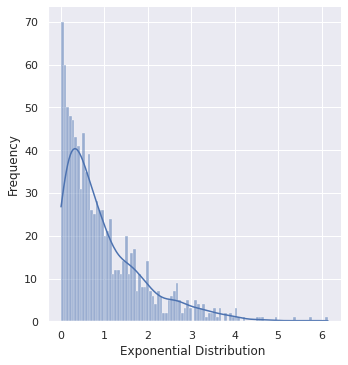

In [14]:
data_expon = expon.rvs(scale=1, loc=0, size=1000)

ax = sns.displot(data_expon,
                 bins=100,
                 kde=True
                 )
ax.set(xlabel='Exponential Distribution ', ylabel='Frequency')

# Beta Distribution



In [15]:
from scipy.stats import beta

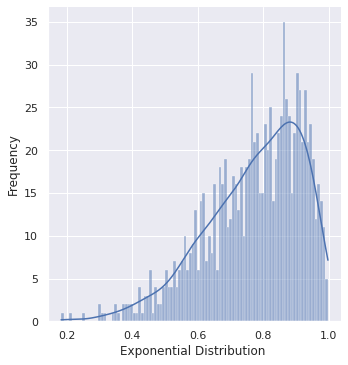

In [18]:
data_beta = beta.rvs(a=5.7, b=1.627, size=1000)

ax = sns.displot(data_beta,
                bins=100,
                kde=True,
                )
ax.set(xlabel='Exponential Distribution ', ylabel='Frequency')

a very goood article on Beta disribution: 
https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af 

# Bayesian Interface & Continous Distributions

## Sleep Data Analysis

In [25]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize

figsize(16, 6)

([<matplotlib.axis.XTick at 0x7fcd02bf9e50>,
 [Text(-60, 0, '9:00'),
  Text(-30, 0, '9:30'),
  Text(0, 0, '10:00'),
  Text(30, 0, '10:30'),
  Text(60, 0, '11:00'),
  Text(90, 0, '11:30'),
  Text(120, 0, '12:00')])

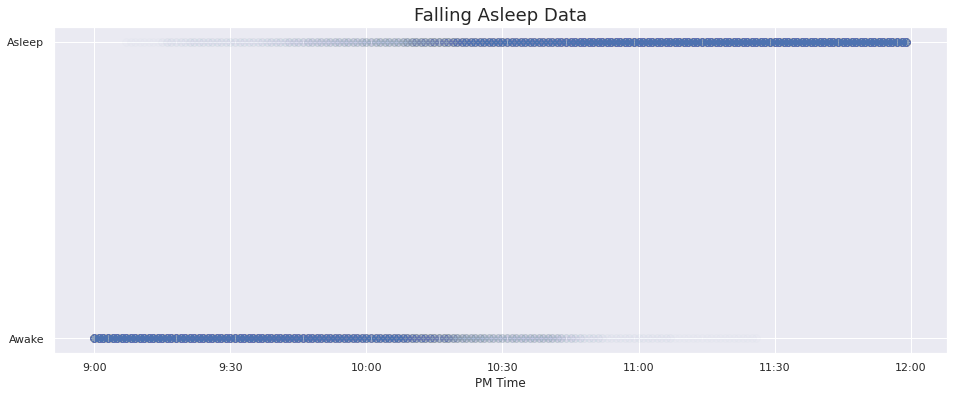

In [27]:
sleep_data = pd.read_csv('data/sleep_data.csv')

#labels for plotting
sleep_labels = ['9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00']

# Sleep Data
plt.scatter(sleep_data['time_offset'], sleep_data['indicator'],
           s = 60, alpha=0.01, facecolor='b', edgecolors='b')
plt.yticks([0, 1], ['Awake', 'Asleep'])
plt.xlabel('PM Time')
plt.title('Falling Asleep Data', size = 18)
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels)

In [36]:
# sort the values by time offset
sleep_data.sort_values('time_offset', inplace=True)

#time is the time offset
time = np.array(sleep_data.loc[:, 'time_offset'])

# Observations are the indicator
sleep_obs = np.array(sleep_data.loc[:, 'indicator'])

In [28]:
sleep_data.head()

,Unnamed: 0,indicator,time_offset
0,2017-12-01 21:00:00,0,-60
1,2017-12-01 21:01:00,0,-59
2,2017-12-01 21:02:00,0,-58
3,2017-12-01 21:03:00,0,-57
4,2017-12-01 21:04:00,0,-56


In [30]:
sleep_data.shape

(11340, 3)

In [31]:
sleep_data.tail()

,Unnamed: 0,indicator,time_offset
11335,2018-02-01 23:55:00,1,115
11336,2018-02-01 23:56:00,1,116
11337,2018-02-01 23:57:00,1,117
11338,2018-02-01 23:58:00,1,118
11339,2018-02-01 23:59:00,1,119


In [37]:
time


array([-60, -60, -60, ..., 119, 119, 119])

In [38]:
sleep_obs

array([0, 0, 0, ..., 1, 1, 1])

In [39]:
sleep_obs[3260:3275]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [40]:
sleep_data.loc[sleep_data['time_offset'] == 0]

,Unnamed: 0,indicator,time_offset
6900,2018-01-08 22:00:00,0,0
1680,2017-12-10 22:00:00,0,0
4740,2017-12-27 22:00:00,1,0
3300,2017-12-19 22:00:00,1,0
2940,2017-12-17 22:00:00,0,0
...,...,...,...
11040,2018-01-31 22:00:00,0,0
780,2017-12-05 22:00:00,1,0
1320,2017-12-08 22:00:00,1,0
9960,2018-01-25 22:00:00,1,0


# Calculating Probability at a Particular Time

In [41]:
time_offset = 15

In [46]:
sleep_vals = sleep_data.loc[(sleep_data['time_offset'] == time_offset) & 
                            (sleep_data['indicator'] == 1)]

In [47]:
awake_vals = sleep_data.loc[(sleep_data['time_offset'] == time_offset) & 
                            (sleep_data['indicator'] == 0)]

In [48]:
print(len(sleep_vals), len(awake_vals))

31 32
